# <p align='center'>КР №3 Диагностика моделей</p>

In [2]:
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut,
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, auc,
    mean_squared_error, r2_score,
)
from yellowbrick.model_selection import LearningCurve

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1 Вариант 4</p><hr>

## Цель работы

* Проверить освоение студентами методы оценки и диагностики моделей машинного обучения.

## Методические указания

* Контрольная работа выполняется в аудитории. В начале занятия преподаватель распределяет по студентам датасеты (задания). Распределение должно проходить случайным образом.
* После получения задания студенты выполняют работу на лабораторных компьютерах. Работа должна быть выполнена студентом самостоятельно. Работа выполняется в виде ноутбука формата и названия файла: Фамилия_группа.ipynb (Иванов_ПМ22-1.ipynb)
* После завершения выполнения работы студент должен сдать работу преподавателю. Работы сдаются в электронном виде с корпоративной почты студента на корпоративную почту преподавателя. Работа должна быть сдана не позже окончания аудиторного занятия.
* Контрольная работа выполняется на лабораторный компьютерах.
* Во время выполнения работы можно пользоваться всем (документацией, прошлыми работами, Интернетом), кроме помощи других студентов, работа выполняется самостоятельно.

## Критерии оценки

1. Код должен выполняться без ошибок. Программные ошибки - сразу 0 баллов.
2. Код должен содержать пояснения в виде ячеек с текстом. В пояснениях нужно писать значимые выводы по ходу выполнения работы.
3. Все графики должны быть правильно подписаны и понятны.
4. Текстовый вывод должен быть нагляден и отформатирован. Численные значения - округлены до разумного количества значащих цифр.

<hr>

## Содержание работы

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.

In [4]:
data = fetch_openml('vertebra-column', version=2)
print(data.DESCR)

**Author**: Guilherme de Alencar Barreto, Ajalmar R. da Rocha Neto, Henrique Antonio Fonseca da Mota Filho       
**Source**: [original](http://www.openml.org/d/1523) - UCI   
**Please cite**:   

* Dataset Title: Vertebra Column - 2 classes

* Abstract:   
Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).

* Source:

Guilherme de Alencar Barreto (guilherme '@' deti.ufc.br) & Ajalmar R. da Rocha Neto (ajalmar '@' ifce.edu.br), Department of Teleinformatics Engineering, Federal University of Ceará, Fortaleza, Ceará, Brazil. 

Henrique Antonio Fonseca da Mota Filho (hdamota '@' gmail.com), Hospital Monte Klinikum, Fortaleza, Ceará, Brazil.


* Data Set Information:

Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied Research in Orthopaedics (GARO) of the Centre Médico-Chirurgical de Réadaptation

In [5]:
data.target.unique()

['1', '2']
Categories (2, object): ['1', '2']

Бизнес-задача: В данном датасете ставится задача классификации шести биомеханических характеристик, на 2 класса

In [6]:
data.frame.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


2. (1 балл) Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [7]:
dataset = data.frame
print(data.target_names)
dataset.head()

['Class']


,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [8]:
dataset.dtypes  # все переменные, кроме таргетной - численные

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
Class    category
dtype: object

In [9]:
dataset.describe()

,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


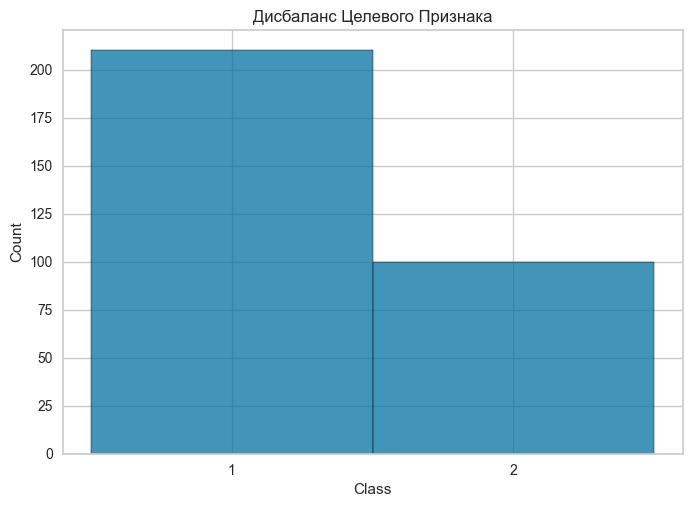

In [10]:
sns.histplot(dataset['Class'])
plt.title('Дисбаланс Целевого Признака')
plt.show()  # исходя из описания и графика делам вывод что классы несбалансированны
# в качестве метрики/оценки будем использовать f1

3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [11]:
dataset.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
Class    category
dtype: object

In [12]:
dataset.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
Class    0
dtype: int64

In [13]:
le = LabelEncoder()  # используем LabelEncoder для трансформации таргетной переменной
dataset['Class'] = le.fit_transform(dataset['Class'])
dataset.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [14]:
dataset.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
Class      int64
dtype: object

4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.

In [15]:
# получаем X, y из датасета и делим в соотношении 80 на 20
X, y = dataset.drop('Class', axis=1), dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# т.к. задача классификации, используем модель логистической регрессии
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
round(clf.score(X_test, y_test), 4)

0.8065

> метод score() аналогичен функции из accuracy_score() из sklearn, он показывает в процентном соотношении количесво верно угаданных классов делёное на общее количество
> LogisticRegression().score(...) = sklearn.metrics.accuracy_score(...)

In [19]:
y_pred = clf.predict(X_test)
round(accuracy_score(y_test, y_pred), 4)

0.8065

5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.

In [20]:
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f'{f1 = :.4f}, {precision = :.4f}, {recall = :.4f}')

f1 = 0.8032, precision = 0.8065, recall = 0.8283


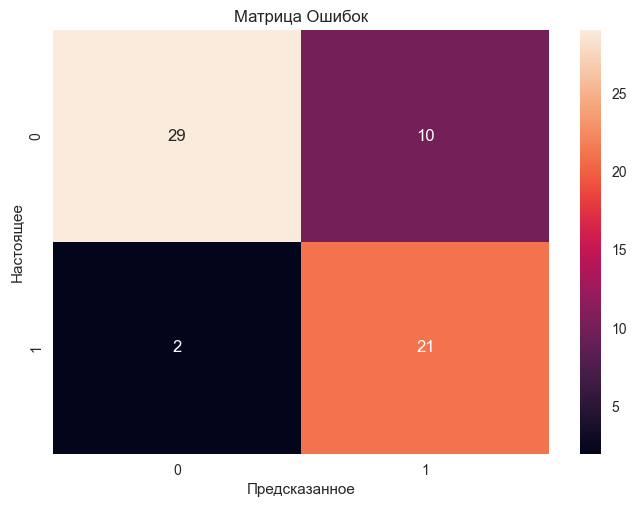

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Матрица Ошибок')
plt.xlabel('Предсказанное')
plt.ylabel('Настоящее')
plt.show()  # все метрики модели довольно высоки
# логистическая регрессия хорошо справляется с поставленной задачей

6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.

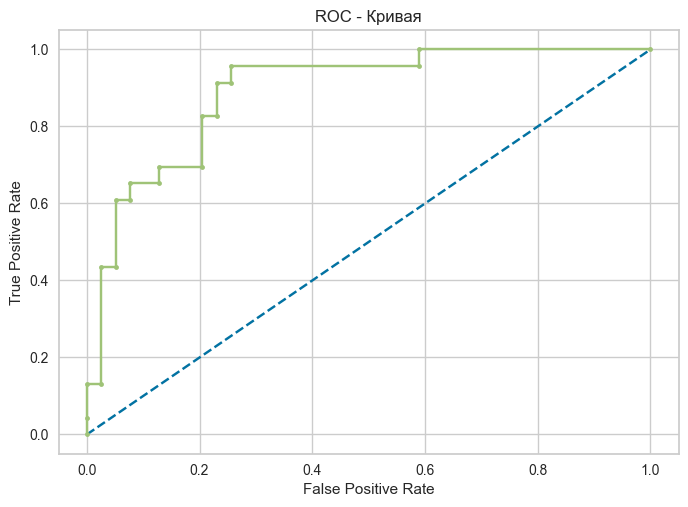

In [22]:
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.title('ROC - Кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
ras = roc_auc_score(y_test, y_pred_proba[:, 1])
round(ras, 4)

0.8907

In [28]:
threshold_opt = thresholds[np.argmax(tpr - fpr)]
round(threshold_opt, 4)

0.491

7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.

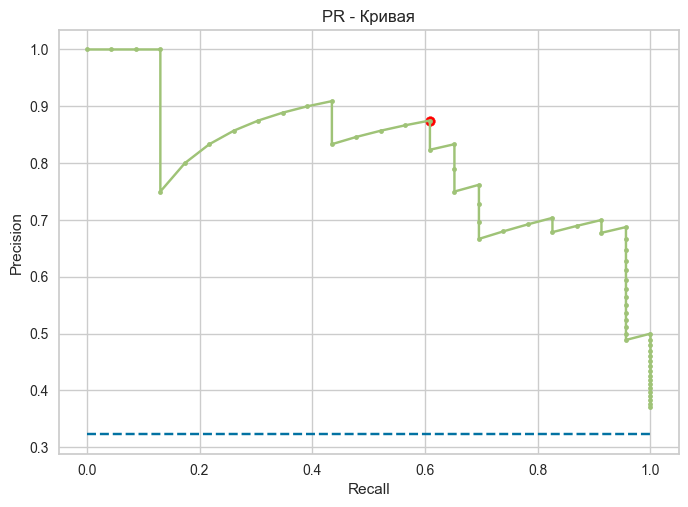

In [29]:
y_pred_proba = clf.predict_proba(X_test)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

beta = 0.5
f_precision = ((1 + beta**2) * precision * recall) / (beta**2 * precision + recall)
ix = np.argmax(f_precision)
no_skill = len(y[y==1]) / len(y)

plt.title('PR - Кривая')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [31]:
pr_auc = auc(recall, precision)
round(pr_auc, 4)

0.8089

In [32]:
round(pr_thresholds[ix], 4)

0.81

8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.

In [33]:
# классы несбалансированы, значит используем Stratified K-Fold
model = DecisionTreeClassifier(max_depth=3)
skf = StratifiedKFold(5)
cvs = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
round(cvs.mean(), 4)

0.7294

In [34]:
model.fit(X_train, y_train)
round(f1_score(y_train, model.predict(X_train)), 4), round(f1_score(y_test, model.predict(X_test)), 4)
# модель показывает хорошие результаты

(0.8304, 0.7273)

9. (2 балл) Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели.

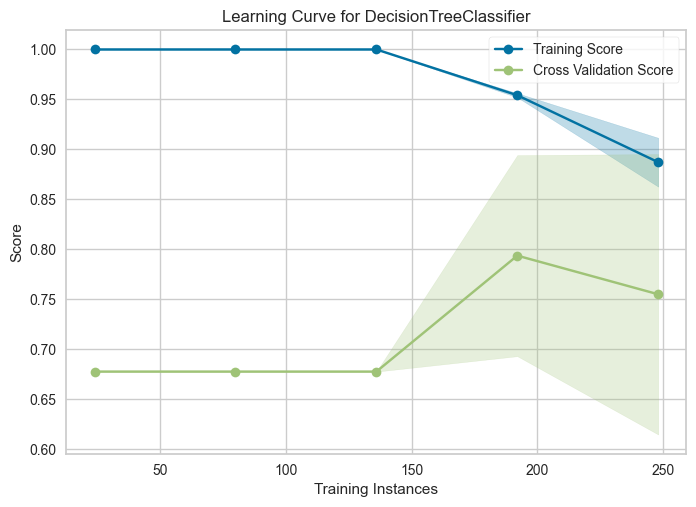

In [27]:
visualizer = LearningCurve(
    model, scoring='accuracy',
).fit(X, y).show()
# присутствует переобучение т.к. занчение cv на тесте (0.75) сильно меньше значения при обучении (0.89)

10. (2 балл) Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.

In [35]:
models_scores = [
    round(cross_val_score(
        SVC(kernel='poly', degree=i),
        X, y, cv=skf, scoring='f1_macro',
    ).mean(), 4)
    for i in (1, 4, 7, 10, 12)
]
models_scores

[0.7244, 0.7951, 0.7742, 0.8051, 0.7487]

In [36]:
model = SVC(kernel='poly', degree=1).fit(X_train, y_train)
round(model.score(X_train, y_train), 4), round(model.score(X_test, y_test), 4)

(0.8669, 0.7903)

In [38]:
# в данном случае от степени полинома зависит переобучится модель или нет
model = SVC(kernel='poly', degree=12).fit(X_train, y_train)
round(model.score(X_train, y_train), 4), round(model.score(X_test, y_test), 4)
# здесть модель показывает хороший результат на обучении и плохой на тесте
# т.к. она подстроилась под обучающие данные, эффективность падает

(0.9637, 0.8548)